In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import pylab as pl
import glob

# Box Counting for 3D arrays

## Instructions for using the code

Image Preprocessing
- First load the imagestack by providing the path, e.g. file=r"path\\*.jpg"
- Use the same variable of the imagestack (in this case file) and use function preprocess(file) for preprocessing the images
- Steps involved in preprocessing are:
    1. Converting the images to grayscale from rgb using togray() function
    2. Thresholding the grayscale images to binary to seperate background and foreground pixels with values 0 and 255 respectively.
    3. The function preprocess returns the binarized imagestack.
    
Calculation of fractal dimension (df) using box counting approach
Using function boxcount() to calculate the df by providing the output of the previous function i.e., imagestack as the argument for the function. For example, if varialbe "array3d=preprocess(file)", then use boxcount(array3d).
- Images are padded to the maximum length of the array. For example, if array3d is of size (512,500,300), it will be padded as (512,512,512)

In [2]:
file=r"E:\\Mtech\\Project\\imagestack1\\*.jpg"

In [3]:
image=file

In [4]:
def preprocess(image):
    glob.glob(image)
    images=[pl.imread(image) for image in glob.glob(file)]
    # Function to convert rgb image to grayscale
    def togray(rgbimage):
        r,g,b=rgbimage[:,:,0],rgbimage[:,:,1],rgbimage[:,:,2]
        gray=0.2989*r+0.5870*g+0.1140*b
        return gray
    gray_images=[togray(image) for image in images]
    
    # Function to threshold images to binary (S=40)
    def threshold(img):
        a,t1=cv2.threshold(img,40,255,cv2.THRESH_BINARY)
        return t1

    thresh_images=[threshold(j) for j in gray_images]
#     If shape of all layers not same, throw error
    arr=np.zeros([*thresh_images[0].shape , len(thresh_images)])
    for i in range(0,len(thresh_images)):
        arr[:,:,i]=np.array(thresh_images[i])
#     thresh_images=np.array([threshold(j) for j in gray_images])
    
    return arr

In [5]:
test=preprocess(image)

In [6]:
test.shape

(512, 512, 243)

In [7]:
# Box counting

In [7]:
def boxcount(array):
    arr_3d=array
    # padding the image
#     max_dim=np.max(arr_3d.shape)
    max_dim = int(2**np.ceil(np.log2(np.max(arr_3d.shape))))
    
    out_test=np.pad(arr_3d, ((0, max_dim-arr_3d.shape[0]), (0, max_dim-arr_3d.shape[1]), (0, max_dim-arr_3d.shape[2])), 'constant')
    
    Ns=[]
    max_box_size=int(np.floor(np.log2(np.min(out_test.shape))))
    scales=np.logspace(max_box_size,1,num=max_box_size,base=2)
    scales=np.floor(scales)
    scales=np.unique(scales)
    int_scales = scales.astype(int)
    
    temp_start = arr_3d
    for scale in int_scales:
        curr_dim = len(temp_start)
        half_ = int(curr_dim/2)
        temp_matrix = np.zeros((half_, half_, half_))
        for k in range(0,curr_dim,2):
            for m in range(0,curr_dim,2):
                for n in range(0,curr_dim,2):
                    if np.any(temp_start[k:k+2,m:m+2,n:n+2]):
                        temp_matrix[int(k/2)][int(m/2)][int(n/2)]=1
        Ns.append(np.count_nonzero(temp_matrix))
        temp_start = temp_matrix
        #print(Ns[-1])
    Ns=np.array(Ns)
    
    coeffs = np.polyfit(np.log(1/scales), np.log(Ns),1)
    fig, ax = plt.subplots(figsize = (8,6))
    ax.scatter(np.log(1/scales), np.log(Ns), c = "teal", label = "Measured ratios")
    ax.set_ylabel("$\log N(\epsilon)$")
    ax.set_xlabel("$\log 1/ \epsilon$")
    fitted_y_vals = np.polyval(coeffs, np.log(1/scales))
    ax.plot(np.log(1/scales), fitted_y_vals, "r", label = f"Fit: {np.round(coeffs[0],3)}X+{coeffs[1]}")
    ax.legend();
    coeffs[0]

CPU times: total: 3min 29s
Wall time: 3min 41s


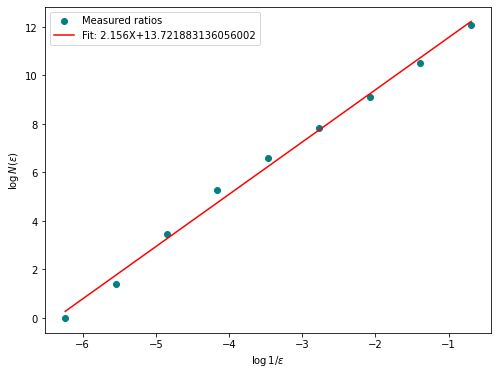

In [9]:
%%time
boxcount(test)